In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Parse data ner

In [2]:
import re

def parse_log(file_path):
    with open(file_path) as f:
        data = f.read()
    train = re.findall(r'Train Loss = (\d+\.\d+)', data)
    valid = re.findall(r'Valid Loss = (\d+\.\d+)', data)
    return train, valid

In [3]:
train_1000, valid_1000 = parse_log('./data/ner_log_1000.txt')

## Parse data ocr

In [4]:
def get_substring(s, start, end):
    try:
        return s.split(start)[1].split(end)[0]
    except BaseException:
        return None
def get_data(filename):
    with open(filename, encoding='utf-8') as file:
        lines = file.readlines()
        lines = [line.rstrip() for line in lines]
        return lines
def parse_data(raw_data):
    new_data = []
    for line in raw_data:
        row = []
        try:
            row.append(int(get_substring(line, start='[' , end='/'))//100) # epoch
        except TypeError:
            continue
        row.append(float(get_substring(line, start='Train loss: ' , end=',')))
        row.append(float(get_substring(line, start='Valid loss: ' , end=',')))
        row.append(float(get_substring(line, start='Elapsed_time: ' , end='\n')))
        new_data.append(row)
    return new_data

In [5]:
data = get_data('./data/ocr_log.txt')
data = parse_data(data)
data = pd.DataFrame(data, columns =['Epoch', 'Train loss', 'Valid loss', 'Elapsed time'])
data.tail()

,Epoch,Train loss,Valid loss,Elapsed time
151,152,0.05129,0.07543,238408.65471
152,153,0.04975,0.07296,240061.44794
153,154,0.04269,0.07260,241715.07992
154,155,0.04386,0.07140,243356.09695
155,156,0.04652,0.07158,244999.26500


<AxesSubplot:>

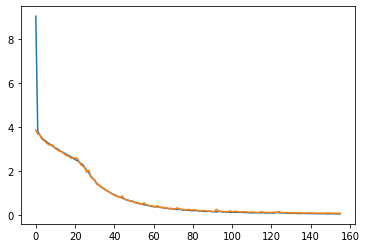

In [6]:
data['Train loss'].plot()
data['Valid loss'].plot()

# Prediction methods

In [7]:
from numpy import asarray

skip = 0
y = data['Valid loss'].tolist()
y = y[skip:]

In [8]:
import numpy
# на сколько шагов назад смотрим
look_back = 78

y_new = y[:]
def create_dataset(y, look_back=look_back):
    dataX, dataY = [], []
    for i in range(len(y) - look_back -1):
        dataX.append(y[i:(i+look_back)])
        dataY.append(y[i + look_back])
    return numpy.array(dataX), numpy.array(dataY)

In [9]:
data_x, data_y = create_dataset(y_new)
print(data_x.shape)
data_x = numpy.reshape(data_x, (data_x.shape[0], 1, data_x.shape[1]))

(77, 78)


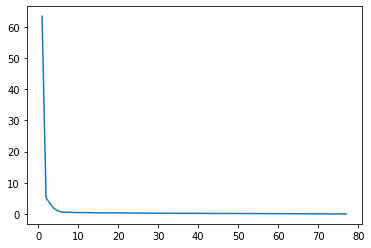

In [10]:
data_x, _ = create_dataset(y_new)
u, s, vh = np.linalg.svd(data_x)

x = np.linspace(1,77,77)

plt.plot(x,s)

In [11]:
def low_rank_k(u,s,vh,num):
    u = u[:,:num]
    vh = vh[:num,:]
    s = s[:num]
    s = np.diag(s)
    my_low_rank = np.dot(np.dot(u,s),vh)
    return my_low_rank

for k in range(1, 76):
    my_rank_k1 = low_rank_k(u,s,vh,k)
    my_rank_k2 = low_rank_k(u,s,vh,k+1)

    # my_diagonal_matrix  = np.diag(np.random.rand(10))

    error1 = np.linalg.norm(data_x - my_rank_k1)
    # error2 = np.linalg.norm(data_x - my_rank_k2 - my_diagonal_matrix)
    error2 = np.linalg.norm(data_x - my_rank_k2)
    print(error1 - error2)



2.435279834627841
1.5168861048249265
0.5990898414052146
0.20465597628418708
0.08906729197187602
0.07607299241889076
0.07636659093167308
0.055933353685164944
0.056287597453322125
0.05733330840992412
0.05703518008831154
0.052972803438020355
0.04675034971316294
0.04441743451868563
0.044039347877146584
0.04263293214433994
0.04362140253430047
0.0427084174297907
0.04344654399744563
0.03987990982783285
0.038864219362997776
0.03611432219543054
0.03595318896188693
0.03599024865975875
0.03122009301237605
0.03199592243776361
0.03098239781968315
0.03158980368371245
0.03000879488443653
0.029884268996947294
0.02933996294233654
0.02703677221521894
0.022863997171322592
0.023455027220954827
0.023806433574476538
0.024390938125917305
0.024695353640774353
0.024775294438626583
0.025334198104282946
0.022095929235452116
0.02274112869350342
0.02286316399342425
0.02330699723737517
0.023405895366081286
0.024446150463178662
0.02447326124126581
0.024233179065532573
0.022846198960730424
0.02292031050026594
0.02224

In [12]:
import numpy
# на сколько шагов назад смотрим
look_back = 10

y_new = y[:]
def create_dataset(y, look_back=look_back):
    dataX, dataY = [], []
    for i in range(len(y) - look_back -1):
        dataX.append(y[i:(i+look_back)])
        dataY.append(y[i + look_back])
    return numpy.array(dataX), numpy.array(dataY)

In [13]:
data_x, data_y = create_dataset(y_new)
print(data_x.shape)
data_x = numpy.reshape(data_x, (data_x.shape[0], 1, data_x.shape[1]))

(145, 10)


In [14]:
data_x

array([[[3.86752, 3.68997, 3.63957, ..., 3.17548, 3.199  , 3.12564]],

       [[3.68997, 3.63957, 3.46535, ..., 3.199  , 3.12564, 3.01835]],

       [[3.63957, 3.46535, 3.38852, ..., 3.12564, 3.01835, 2.96148]],

       ...,

       [[0.08221, 0.07933, 0.08   , ..., 0.08227, 0.07634, 0.07543]],

       [[0.07933, 0.08   , 0.07777, ..., 0.07634, 0.07543, 0.07296]],

       [[0.08   , 0.07777, 0.07556, ..., 0.07543, 0.07296, 0.0726 ]]])

In [15]:
len(data_y)

145

In [90]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
import tensorflow as tf
# Сохраняем только лучшую модельку

how_much_train = 100

checkpoint = ModelCheckpoint('model.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto') 
# Модельку можно менять или вообще не использовать, а придумать способ проще
# Поменять количество нейронов, помешать нормально данные для валидации и тренировки и т.д.
model = Sequential()
model.add(LSTM(128, return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(data_x[:how_much_train], data_y[:how_much_train], validation_data=(data_x[how_much_train-30:how_much_train+30],data_y[how_much_train-30:how_much_train+30]), epochs=500, batch_size=128, verbose=1,shuffle=True, callbacks=[checkpoint])

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 1.6204
Epoch 00001: val_loss improved from inf to 0.01725, saving model to model.h5
1/1 [==============================] - 10s 10s/step - loss: 1.6204 - val_loss: 0.0173
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 1.4528
Epoch 00002: val_loss improved from 0.01725 to 0.01456, saving model to model.h5
1/1 [==============================] - 0s 191ms/step - loss: 1.4528 - val_loss: 0.0146
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 1.2945
Epoch 00003: val_loss improved from 0.01456 to 0.01210, saving model to model.h5
1/1 [==============================] - 0s 116ms/step - loss: 1.2945 - val_loss: 0.0121
Epoch 4/500
1/1 [==============================] - ETA: 0s - loss: 1.1453
Epoch 00004: val_loss improved from 0.01210 to 0.00989, saving model to model.h5
1/1 [==============================] - 0s 97ms/step - loss: 1.1453 - val_loss: 0.0099
Epoch 5/500
1/1 [=====================

In [91]:
from keras.models import load_model
model = load_model('model.h5')

In [87]:
import numpy as np

def predict_new_data(old_data, predict_count=100, look_back=look_back):
    new_data = []
    old_data_copy = old_data[:]
    for i in range(predict_count):
        new_value = model.predict(np.array([[old_data_copy[-look_back:]]]))
        new_data.append(new_value[0][0])
        old_data_copy.append(new_value[0][0])
    return new_data
                            

In [82]:
def predict_epoch_with_loss(old_data, look_back=look_back, loss=0.04, break_line=300):
    new_data = []
    new_value = 100
    old_data_copy = old_data[:]
    i = 0
    while new_value > loss:
        i += 1
        new_value = model.predict(np.array([[old_data_copy[-look_back:]]]))[0][0]
        new_data.append(new_value)
        old_data_copy.append(new_value)
        if i > break_line:
            break
    return i, new_data
                     

In [92]:
y_pred = predict_new_data(y_new)

## Plot

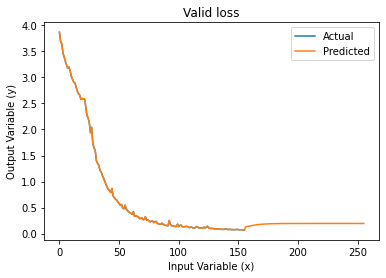

In [84]:
## validation set is 0:10

from matplotlib import pyplot
# inverse transforms
x_plot = [i for i in range(len(y))]
y_plot = y
y_pred_plot = y + y_pred
x_pred_plot = [i for i in range(len(y_pred_plot))]
pyplot.plot(x_plot,y_plot, label='Actual')
pyplot.plot(x_pred_plot,y_pred_plot, label='Predicted')
pyplot.title('Valid loss')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()



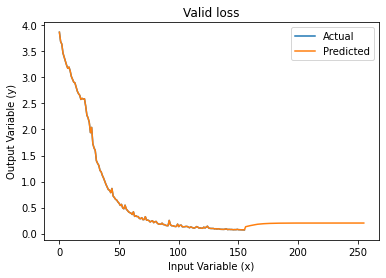

In [89]:
## validation set is 0:100

from matplotlib import pyplot
# inverse transforms
x_plot = [i for i in range(len(y))]
y_plot = y
y_pred_plot = y + y_pred
x_pred_plot = [i for i in range(len(y_pred_plot))]
pyplot.plot(x_plot,y_plot, label='Actual')
pyplot.plot(x_pred_plot,y_pred_plot, label='Predicted')
pyplot.title('Valid loss')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()

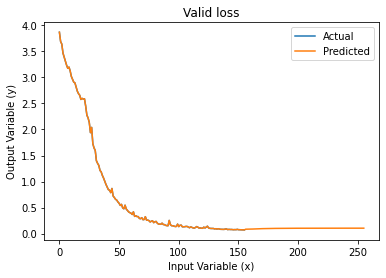

In [93]:
## validation set 100-40:100+40

from matplotlib import pyplot
# inverse transforms
x_plot = [i for i in range(len(y))]
y_plot = y
y_pred_plot = y + y_pred
x_pred_plot = [i for i in range(len(y_pred_plot))]
pyplot.plot(x_plot,y_plot, label='Actual')
pyplot.plot(x_pred_plot,y_pred_plot, label='Predicted')
pyplot.title('Valid loss')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.show()

# Time series analysis

In [16]:
ts = data['Train loss']
ts

0      9.05394
1      3.80067
2      3.64374
3      3.51403
4      3.42376
        ...   
151    0.05129
152    0.04975
153    0.04269
154    0.04386
155    0.04652
Name: Train loss, Length: 156, dtype: float64

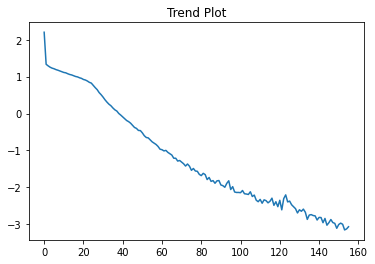

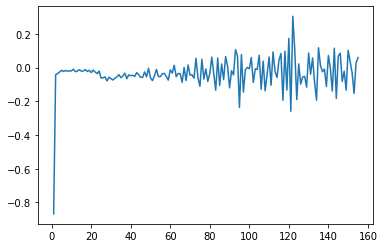

In [17]:
ts_log = np.log(ts)
plt.plot(ts_log)

plt.title("Trend Plot")
plt.show()

ts_log_diff = ts_log - ts_log.shift(1)
plt.plot(ts_log_diff)


Text(0.5, 1.0, 'Autocorrelation Function')

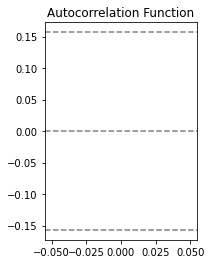

In [18]:
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.arima_model import ARIMA
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=12)

# lag_pacf = pacf(ts_log_diff, nlags=12, method='ols-inefficient')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# #Plot PACF:
# plt.subplot(122)
# plt.plot(lag_pacf)
# plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
# plt.title('Partial Autocorrelation Function')
# plt.tight_layout()


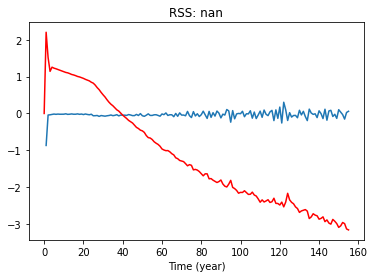

In [19]:
model = ARIMA(ts_log, order=(2,1,0))
results_AR = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - ts_log_diff)**2))
plt.xlabel("Time (year)")
plt.show()

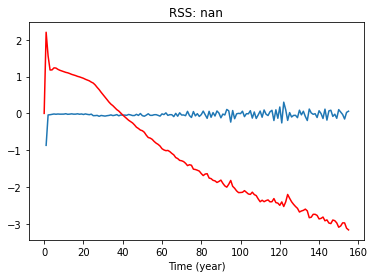

In [20]:
model = ARIMA(ts_log, order=(0,1,2))
results_MA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - ts_log_diff)**2))
plt.xlabel("Time (year)")
plt.show()

c:\program files\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\program files\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\program files\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


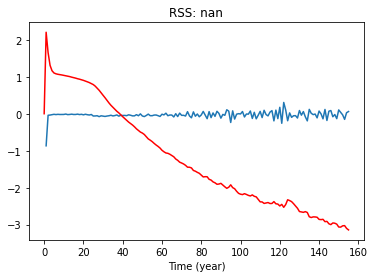

In [21]:
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - ts_log_diff)**2))
plt.xlabel("Time (year)")
plt.show()

In [22]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_ARIMA_diff.head()

0    0.000000
1    2.203200
2    1.652300
3    1.308413
4    1.161873
dtype: float64

In [23]:
predictions_ARIMA_diff_cum_sum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cum_sum.head()

0    0.000000
1    2.203200
2    3.855500
3    5.163913
4    6.325786
dtype: float64

In [24]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0],index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cum_sum,fill_value=0)
predictions_ARIMA_log.head()

0    2.203200
1    4.406400
2    6.058700
3    7.367113
4    8.528986
dtype: float64

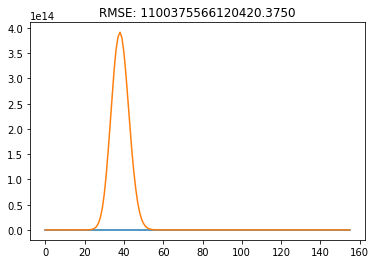

In [25]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'%np.sqrt(sum((predictions_ARIMA-ts)**2)))
plt.show()



# Time series analysis for train loss

In [ ]:
ts = data['Valid loss']
ts

In [ ]:
ts_log = np.log(ts)
plt.plot(ts_log)

plt.title("Trend Plot")
plt.show()

ts_log_diff = ts_log - ts_log.shift(1)
plt.plot(ts_log_diff)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.arima_model import ARIMA
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=12)

# lag_pacf = pacf(ts_log_diff, nlags=12, method='ols-inefficient')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# #Plot PACF:
# plt.subplot(122)
# plt.plot(lag_pacf)
# plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
# plt.title('Partial Autocorrelation Function')
# plt.tight_layout()


In [ ]:
model = ARIMA(ts_log, order=(2,1,0))
results_AR = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - ts_log_diff)**2))
plt.xlabel("Time (year)")
plt.show()

In [ ]:
model = ARIMA(ts_log, order=(0,1,2))
results_MA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - ts_log_diff)**2))
plt.xlabel("Time (year)")
plt.show()

In [ ]:
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - ts_log_diff)**2))
plt.xlabel("Time (year)")
plt.show()

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_ARIMA_diff.head()

In [ ]:
predictions_ARIMA_diff_cum_sum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cum_sum.head()

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0],index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cum_sum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'%np.sqrt(sum((predictions_ARIMA-ts)**2)))
plt.ylabel("# of passengers")
plt.xlabel("Time (year)")
plt.show()

# Time series analysis for last column

In [36]:
ts = data['Elapsed time']
ts

0          22.30262
1        1417.48309
2        2810.34028
3        4208.55189
4        5611.42589
           ...     
151    238408.65471
152    240061.44794
153    241715.07992
154    243356.09695
155    244999.26500
Name: Elapsed time, Length: 156, dtype: float64

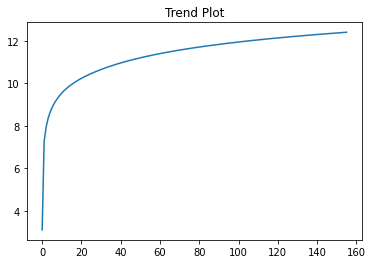

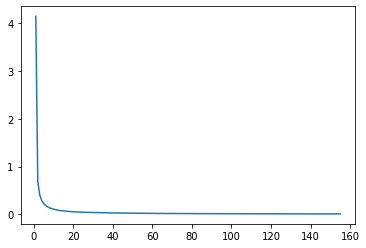

In [37]:
ts_log = np.log(ts)
plt.plot(ts_log)

plt.title("Trend Plot")
plt.show()

ts_log_diff = ts_log - ts_log.shift(1)
plt.plot(ts_log_diff)


Text(0.5, 1.0, 'Autocorrelation Function')

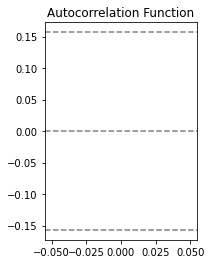

In [38]:
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.arima_model import ARIMA
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=12)

# lag_pacf = pacf(ts_log_diff, nlags=12, method='ols-inefficient')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# #Plot PACF:
# plt.subplot(122)
# plt.plot(lag_pacf)
# plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
# plt.title('Partial Autocorrelation Function')
# plt.tight_layout()


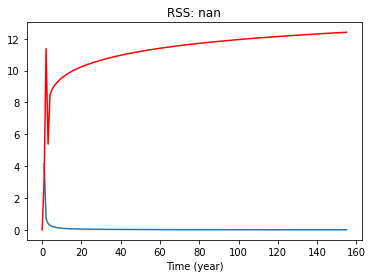

In [39]:
model = ARIMA(ts_log, order=(2,1,0))
results_AR = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - ts_log_diff)**2))
plt.xlabel("Time (year)")
plt.show()

c:\program files\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


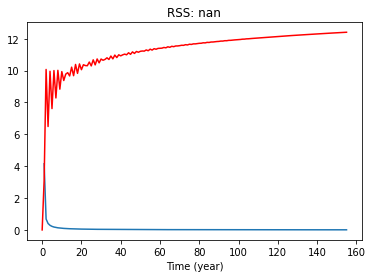

In [40]:
model = ARIMA(ts_log, order=(0,1,2))
results_MA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - ts_log_diff)**2))
plt.xlabel("Time (year)")
plt.show()

c:\program files\python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


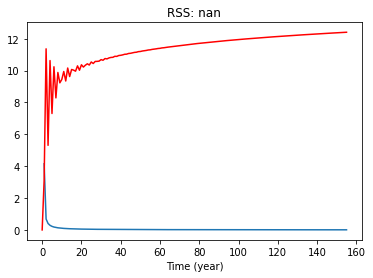

In [41]:
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - ts_log_diff)**2))
plt.xlabel("Time (year)")
plt.show()

In [42]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_ARIMA_diff.head()

0     0.000000
1     3.105082
2    11.368713
3     5.310163
4    10.631109
dtype: float64

In [43]:
predictions_ARIMA_diff_cum_sum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cum_sum.head()

0     0.000000
1     3.105082
2    14.473795
3    19.783958
4    30.415068
dtype: float64

In [44]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0],index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cum_sum,fill_value=0)
predictions_ARIMA_log.head()

0     3.104704
1     6.209786
2    17.578500
3    22.888662
4    33.519772
dtype: float64

c:\program files\python37\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


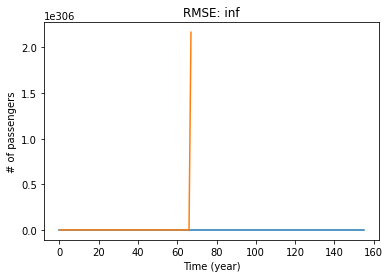

In [45]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'%np.sqrt(sum((predictions_ARIMA-ts)**2)))
plt.ylabel("# of passengers")
plt.xlabel("Time (year)")
plt.show()
